/home/ubuntu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


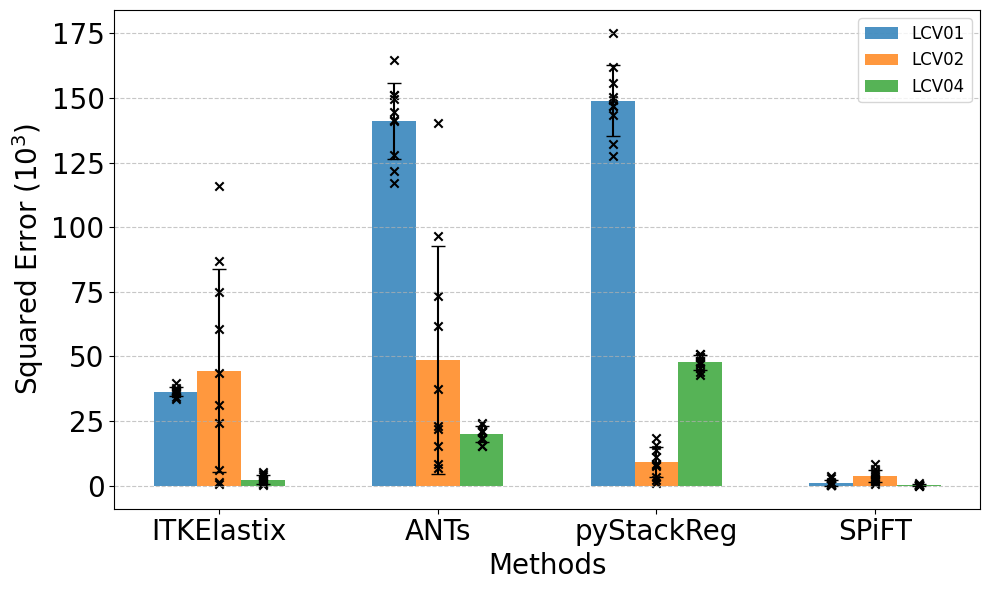

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the samples
samples = ['LCV01', 'LCV02', 'LCV04']

# Initialize a list to store dataframes
dataframes = []

# Load data and append to list
for x in samples:
    df = pd.read_csv("all_completed_alignments/" + x + "/error_alignment_scores.csv")
    df /= 1000

    dataframes.append(df)


# Exclude 'Unnamed: 0' and prepare data for plotting
methods = ['ITKElastix', 'ANTs', 'pyStackReg', 'SPiFT']
mean_errors = []
std_errors = []
all_errors = {method: [] for method in methods}

# Calculate means, stds and prepare for plotting
for df in dataframes:
    means = df[methods].mean().values
    stds = df[methods].std().values
    mean_errors.append(means)
    std_errors.append(stds)

    for method in methods:
        all_errors[method].append(df[method].values)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(methods))

# Update colors to a more traditional color palette suitable for publication
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green (traditional publication colors)

# Plot bars for each sample with slight opacity
for i, (sample, color) in enumerate(zip(samples, colors)):
    ax.bar(index + i * bar_width, mean_errors[i], bar_width, yerr=std_errors[i], label=sample, color=color, alpha=0.8, capsize=5)

    # Add individual values marked with 'x'
    for j, method in enumerate(methods):
        ax.scatter([index[j] + i * bar_width] * len(all_errors[method][i]), all_errors[method][i], color='black', marker='x')

# Add y-axis grid marks
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Increase font size for publication
ax.set_xlabel('Methods', fontsize=20)
ax.set_ylabel('Squared Error ($10^{3}$)', fontsize=20)
#ax.set_title('Mean Error by Method and Sample', fontsize=16)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(methods, fontsize=20)
ax.tick_params(axis='y', labelsize=20)

# Add legend with larger font size
ax.legend(fontsize=12)

# Display the plot with tighter layout
plt.tight_layout()
plt.show()


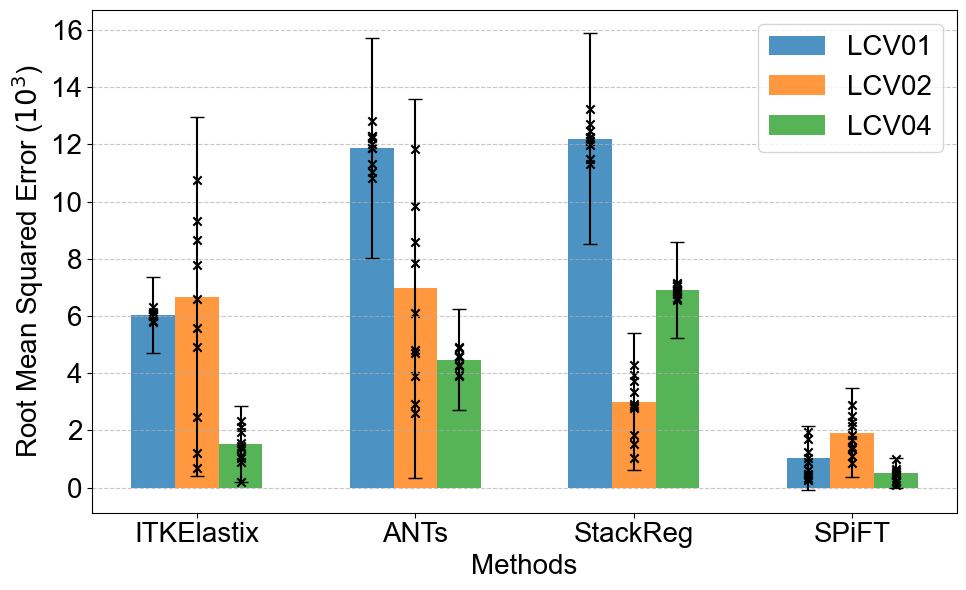

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
# Define the samples
samples = ['LCV01', 'LCV02', 'LCV04']
matplotlib.rcParams['font.family'] = 'Arial'


# Initialize a list to store dataframes
dataframes = []

# Load data and append to list
for x in samples:
    df = pd.read_csv("all_completed_alignments/" + x + "/error_alignment_scores.csv")
    df /= 1000  # Adjust if necessary, depending on your error values

    dataframes.append(df)

# Exclude 'Unnamed: 0' and prepare data for plotting
# Renamed pyStackReg to StackReg here
methods = ['ITKElastix', 'ANTs', 'StackReg', 'SPiFT']
rmse_errors = []
std_rmse_errors = []
all_errors = {method: [] for method in methods}

# Calculate RMSE and standard deviations, and prepare for plotting
for df in dataframes:
    rmse = np.sqrt(df[['ITKElastix', 'ANTs', 'pyStackReg', 'SPiFT']].mean()).values  # Use original column name
    std_rmse = np.sqrt(df[['ITKElastix', 'ANTs', 'pyStackReg', 'SPiFT']].std()).values  # Use original column name
    rmse_errors.append(rmse)
    std_rmse_errors.append(std_rmse)

    for method, original_method in zip(methods, ['ITKElastix', 'ANTs', 'pyStackReg', 'SPiFT']):
        all_errors[method].append(df[original_method].values)  # Use original column names in the dataframe

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(methods))

# Update colors to a more traditional color palette suitable for publication
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green (traditional publication colors)

# Plot bars for each sample with slight opacity
for i, (sample, color) in enumerate(zip(samples, colors)):
    ax.bar(index + i * bar_width, rmse_errors[i], bar_width, yerr=std_rmse_errors[i], label=sample, color=color, alpha=0.8, capsize=5)

    # Add individual values marked with 'x'
    for j, method in enumerate(methods):
        ax.scatter([index[j] + i * bar_width] * len(all_errors[method][i]), np.sqrt(all_errors[method][i]), color='black', marker='x')

# Add y-axis grid marks
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Increase font size for publication
ax.set_xlabel('Methods', fontsize=20)
ax.set_ylabel('Root Mean Squared Error ($10^{3}$)', fontsize=20)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(methods, fontsize=20)
ax.tick_params(axis='y', labelsize=20)

# Add legend with larger font size
ax.legend(fontsize=20)  # Increased font size of legend

# Display the plot with tighter layout
plt.tight_layout()


output_pdf_path = "error_analysis_plot.pdf"
plt.savefig(output_pdf_path)
plt.show()


